In [ ]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.externals.six import StringIO  
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as pyplot
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix
from warnings import simplefilter
import time
import matplotlib.pyplot as plt

start = time.time()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
#one dataset to be splitted
df = pd.read_csv("mqttdataset_reduced.csv") 
seed = 7
class_names = df.target.unique()
df=df.astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

x_columns = df.columns.drop('target')
x = df[x_columns].values
y = df['target']

print("Ready to generate train and test datasets")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=seed)
print("x_train, y_train, x_test, y_test" + str(x_train.shape) + "" +str(y_train.shape) + "" +str(x_test.shape) + "" +str(y_test.shape))

Ready to generate train and test datasets
x_train, y_train, x_test, y_test(231648, 33)(231648,)(99278, 33)(99278,)


In [ ]:
print(y_train.unique())

[3 1 0 5 4 2]


In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
y_train.replace(0,1,inplace=True)
y_train.replace(2,1,inplace=True)
y_train.replace(3,1,inplace=True)


In [ ]:
print("Ready to generate train and test datasets")

#Neural network
print("Starting Random forest")
model = Sequential()
model.add(Dense(50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(30, input_dim=x_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(20, kernel_initializer='normal'))
model.add(Dense(6,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=200,batch_size=1000) 
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nn = model.predict(x_test)
y_pred_nn = np.argmax(y_pred_nn,axis=1)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

print(model.summary())

Ready to generate train and test datasets
Starting Random forest
Epoch 1/200
232/232 - 1s - loss: 1.1141 - accuracy: 0.7555 - val_loss: 0.5713 - val_accuracy: 0.7856
Epoch 2/200
232/232 - 1s - loss: 0.4937 - accuracy: 0.8158 - val_loss: 0.4461 - val_accuracy: 0.8511
Epoch 3/200
232/232 - 1s - loss: 0.4027 - accuracy: 0.8678 - val_loss: 0.3704 - val_accuracy: 0.8808
Epoch 4/200
232/232 - 1s - loss: 0.3436 - accuracy: 0.8897 - val_loss: 0.3035 - val_accuracy: 0.8991
Epoch 5/200
232/232 - 1s - loss: 0.2923 - accuracy: 0.9038 - val_loss: 0.2850 - val_accuracy: 0.9076
Epoch 6/200
232/232 - 1s - loss: 0.2778 - accuracy: 0.9039 - val_loss: 0.2547 - val_accuracy: 0.9037
Epoch 7/200
232/232 - 1s - loss: 0.2485 - accuracy: 0.9113 - val_loss: 0.2407 - val_accuracy: 0.9165
Epoch 8/200
232/232 - 1s - loss: 0.2372 - accuracy: 0.9151 - val_loss: 0.2251 - val_accuracy: 0.9203
Epoch 9/200
232/232 - 1s - loss: 0.2276 - accuracy: 0.9187 - val_loss: 0.2176 - val_accuracy: 0.9208
Epoch 10/200
232/232 - 1s 

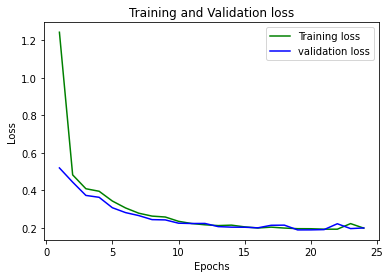

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,25)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#RandomForest
print("Starting Random forest")
classifier = RandomForestClassifier(verbose=2,random_state=seed)
classifier.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_random = classifier.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

Starting Random forest
building tree 1 of 100
building tree 2 of 100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Test time: 0.8783087730407715


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


In [ ]:
#Create Naive Bayes Classifier
print("Starting Naive Bayes")
gnb = GaussianNB()
gnb.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_nb = gnb.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

Starting Naive Bayes
Training time: 57.330183267593384
Test time: 0.1044611930847168


In [ ]:
#Decision tree
print("Starting Decision tree")
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_dt = clf.predict(x_test)
y_pred_dt_roc = clf.predict_proba(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

Starting Decision tree
Training time: 62.108720541000366
Test time: 0.025115489959716797


In [ ]:
#Multi layer perceptron
print("Starting Multi layer perceptron")
model = MLPClassifier( max_iter=130, batch_size=1000, alpha=1e-4, activation = 'relu',solver='adam', verbose=10, tol=1e-4, random_state=seed)
model.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_mlp = model.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

Starting Multi layer perceptron
Iteration 1, loss = inf
Iteration 2, loss = inf
Iteration 3, loss = 0.94676840
Iteration 4, loss = 0.73447833
Iteration 5, loss = 0.67019686
Iteration 6, loss = 0.69309756
Iteration 7, loss = inf
Iteration 8, loss = 0.72666458
Iteration 9, loss = inf
Iteration 10, loss = inf
Iteration 11, loss = inf
Iteration 12, loss = inf
Iteration 13, loss = 0.48484243
Iteration 14, loss = 0.40782022
Iteration 15, loss = inf
Iteration 16, loss = inf
Iteration 17, loss = inf
Iteration 18, loss = inf
Iteration 19, loss = inf
Iteration 20, loss = 0.40954129
Iteration 21, loss = 0.44601944
Iteration 22, loss = inf
Iteration 23, loss = inf
Iteration 24, loss = inf
Iteration 25, loss = inf
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training time: 89.05095076560974
Test time: 0.15749025344848633


In [ ]:
#Gradient boost
print("Starting Gradient boost")
model = GradientBoostingClassifier(n_estimators=20, random_state=seed,verbose=2)
model.fit(x_train, y_train)
end = time.time()
diff=end-start
print("Training time: " + str(diff))
starttest = time.time()
y_pred_gradient = model.predict(x_test)
endtest =time.time()
difftest = endtest-starttest
print("Test time: " + str(difftest))

Starting Gradient boost
      Iter       Train Loss   Remaining Time 
         1      194090.2842           34.76s
         2      171853.1125           33.61s
         3      150572.2483           31.62s
         4      135161.8381           29.67s
         5      123227.4341           27.87s
         6      113346.1088           26.19s
         7      106002.8011           24.38s
         8       98887.7899           22.59s
         9       92860.4962           20.71s
        10       87709.3871           18.88s
        11       82472.4487           17.04s
        12       78754.0483           15.21s
        13       75172.1397           13.34s
        14       71636.7287           11.45s
        15       69032.9594            9.56s
        16       66685.4773            7.67s
        17       64472.7939            5.76s
        18       62357.8948            3.84s
        19       60632.7941            1.92s
        20       59178.7981            0.00s
Training time: 132.43203520774

In [ ]:
print("Decision Tree, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_dt)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_dt,average='weighted')))
matrixdt = confusion_matrix(y_test,y_pred_dt)
print(matrixdt)

Decision Tree, accuracy: 0.9389492133201717 F1 score:0.937661419856719
[[ 3645   426     1     9   295     0]
 [  282 35802     0  2859    51     0]
 [    1    22    95    72     2     0]
 [    0   640     0 49009     0     0]
 [ 1065   309     0    27  1879     0]
 [    0     0     0     0     0  2787]]


In [ ]:
print("Naive Bayes, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_nb)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_nb,average='weighted')))
matrixnv = confusion_matrix(y_test,y_pred_nb)
print(matrixnv)

Naive Bayes, accuracy: 0.6341384798243317 F1 score:0.7303523875083585
[[  458     1     1   490    11  3415]
 [    0 28027     1    11     3 10952]
 [    0     0    95     3     0    94]
 [    0     0   138 31128   185 18198]
 [    0    89     8   335   465  2383]
 [    0     0     0     4     0  2783]]


In [ ]:
print("Neural network, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_nn)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_nn,average='weighted')))
matrixnn = confusion_matrix(y_test,y_pred_nn)
print(matrixnn)

Neural network, accuracy: 0.4336610326557747 F1 score:0.27539700634488323
[[    0  4280     0     0    91     5]
 [    0 38844     0     0   149     1]
 [    0   191     0     0     0     1]
 [    0 49646     0     0     0     3]
 [    0  1770     0     0  1508     2]
 [    0    72     0     0    14  2701]]


In [ ]:
print("MultiLayerPerceptron, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_mlp)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_mlp,average='weighted')))
matrixml = confusion_matrix(y_test,y_pred_mlp)
print(matrixml)

MultiLayerPerceptron, accuracy: 0.9178569270130341 F1 score:0.9152290439913378
[[ 3201   435     0   266    21   453]
 [  326 35026     0  3444    52   146]
 [    4     2    86    91     7     2]
 [   47   431     0 48723   445     3]
 [ 1005   406     1   184  1370   314]
 [   59     1     0     0    10  2717]]


In [ ]:
print("Random Forest, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_random)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_random,average='weighted')))
matrixrf = confusion_matrix(y_test,y_pred_random)
print(matrixrf)

Random Forest, accuracy: 0.9388484860694212 F1 score:0.9376255158828146
[[ 3591   430     1     9   345     0]
 [  273 35803     0  2859    59     0]
 [    1    22    95    72     2     0]
 [    0   640     0 49009     0     0]
 [ 1021   310     0    27  1922     0]
 [    0     0     0     0     0  2787]]


In [ ]:
print("GradienBoost, accuracy: " + str(metrics.accuracy_score(y_test, y_pred_gradient)) + " F1 score:" + str(metrics.f1_score(y_test, y_pred_gradient,average='weighted')))
matrixgb = confusion_matrix(y_test,y_pred_gradient)
print(matrixgb)

GradienBoost, accuracy: 0.9290980881967807 F1 score:0.926431879218929
[[ 3631   466     2   272     5     0]
 [  423 35047     0  3516     8     0]
 [    4     1    92    94     1     0]
 [   47   346     0 49256     0     0]
 [ 1278   286     0   290  1426     0]
 [    0     0     0     0     0  2787]]
